<a href="https://colab.research.google.com/github/nw93929/DS3001Project/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('2019-20_pbp.csv')
data = data.drop(["URL", "Time", "Unnamed: 40"], axis=1)
data['WinnerPlay'] = data.apply(
    lambda row: row['HomePlay'] if row['WinningTeam'] == row['HomeTeam'] else row['AwayPlay'],
    axis=1
)
data['LosingTeam'] = data.apply(
    lambda row: row['HomeTeam'] if row['WinningTeam'] == row['AwayTeam'] else row['AwayTeam'],
    axis=1
)
data['LosingPlay'] = data.apply(
    lambda row: row['AwayPlay'] if row['WinningTeam'] == row['HomeTeam'] else row['HomePlay'],
    axis=1
)
data['Winner'] = data.apply(
    lambda row: 1 if row['WinningTeam'] == row['HomeTeam'] and pd.notna(row["HomePlay"] else 0,
    axis=1
)
data.columns

Index(['GameType', 'Location', 'Date', 'WinningTeam', 'Quarter', 'SecLeft',
       'AwayTeam', 'AwayPlay', 'AwayScore', 'HomeTeam', 'HomePlay',
       'HomeScore', 'Shooter', 'ShotType', 'ShotOutcome', 'ShotDist',
       'Assister', 'Blocker', 'FoulType', 'Fouler', 'Fouled', 'Rebounder',
       'ReboundType', 'ViolationPlayer', 'ViolationType', 'TimeoutTeam',
       'FreeThrowShooter', 'FreeThrowOutcome', 'FreeThrowNum', 'EnterGame',
       'LeaveGame', 'TurnoverPlayer', 'TurnoverType', 'TurnoverCause',
       'TurnoverCauser', 'JumpballAwayPlayer', 'JumpballHomePlayer',
       'JumpballPoss', 'WinnerPlay', 'LosingTeam', 'LosingPlay'],
      dtype='object')

In [ ]:
EDA_data = data[["Date","WinningTeam","WinnerPlay", "ShotType", "Assister", "Blocker", "FoulType", "ReboundType", "ViolationType", "FreeThrowShooter", "TurnoverType"]]
playcounts = EDA_data.groupby(["Date","WinningTeam"]).count().reset_index()
playcounts.rename(columns={"ShotType" :"WinnerShots", "Assister":"WinnerAssists", "Blocker":"WinnerBlocks", "FoulType": "WinnerFouls", "ReboundType": "WinnerRebounds", "ViolationType": "WinnerViolations", "FreeThrowShooter":"WinnerFreeThrows", "TurnoverType":"WinnerTurnovers"}, inplace=True)
playcounts.head()

,Date,WinningTeam,WinnerPlay,WinnerShots,WinnerAssists,WinnerBlocks,WinnerFouls,WinnerRebounds,WinnerViolations,WinnerFreeThrows,WinnerTurnovers
0,August 1 2020,IND,224,188,51,10,55,105,1,48,31
1,August 1 2020,LAC,240,172,47,3,52,115,0,63,28
2,August 1 2020,MIA,248,161,57,4,60,92,2,61,35
3,August 1 2020,OKC,234,164,36,12,43,99,3,46,38
4,August 1 2020,TOR,248,166,41,17,57,114,4,59,36


In [ ]:
EDA_data2 = data[["Date","LosingTeam","LosingPlay", "ShotType", "Assister", "Blocker", "FoulType", "ReboundType", "ViolationType", "FreeThrowShooter", "TurnoverType"]]
playcounts2 = EDA_data2.groupby(["Date","LosingTeam"]).count().reset_index()
playcounts2.rename(columns={"ShotType" :"LoserShots", "Assister":"LoserAssists", "Blocker":"LoserBlocks", "FoulType": "LoserFouls", "ReboundType": "LoserRebounds", "ViolationType": "LoserViolations", "FreeThrowShooter":"LoserFreeThrows", "TurnoverType":"LoserTurnovers"}, inplace=True)
playcounts2.head()

,Date,LosingTeam,LosingPlay,LoserShots,LoserAssists,LoserBlocks,LoserFouls,LoserRebounds,LoserViolations,LoserFreeThrows,LoserTurnovers
0,August 1 2020,DEN,248,161,57,4,60,92,2,61,35
1,August 1 2020,LAL,259,166,41,17,57,114,4,59,36
2,August 1 2020,NOP,244,172,47,3,52,115,0,63,28
3,August 1 2020,PHI,277,188,51,10,55,105,1,48,31
4,August 1 2020,UTA,231,164,36,12,43,99,3,46,38


In [ ]:
playsdata = pd.concat([playcounts, playcounts2], axis=1)
playsdata

,Date,WinningTeam,WinnerPlay,WinnerShots,WinnerAssists,WinnerBlocks,WinnerFouls,WinnerRebounds,WinnerViolations,WinnerFreeThrows,...,LosingTeam,LosingPlay,LoserShots,LoserAssists,LoserBlocks,LoserFouls,LoserRebounds,LoserViolations,LoserFreeThrows,LoserTurnovers
0,August 1 2020,IND,224,188,51,10,55,105,1,48,...,DEN,248,161,57,4,60,92,2,61,35
1,August 1 2020,LAC,240,172,47,3,52,115,0,63,...,LAL,259,166,41,17,57,114,4,59,36
2,August 1 2020,MIA,248,161,57,4,60,92,2,61,...,NOP,244,172,47,3,52,115,0,63,28
3,August 1 2020,OKC,234,164,36,12,43,99,3,46,...,PHI,277,188,51,10,55,105,1,48,31
4,August 1 2020,TOR,248,166,41,17,57,114,4,59,...,UTA,231,164,36,12,43,99,3,46,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,September 7 2020,LAC,237,169,55,4,46,92,1,36,...,TOR,203,162,42,11,45,96,3,40,27
1139,September 8 2020,LAL,218,159,48,7,33,85,1,37,...,HOU,178,159,48,7,33,85,1,37,25
1140,September 8 2020,MIA,241,164,41,12,45,105,1,50,...,MIL,249,164,41,12,45,105,1,50,33
1141,September 9 2020,LAC,248,147,38,10,51,99,3,56,...,BOS,250,201,54,12,52,123,4,43,29


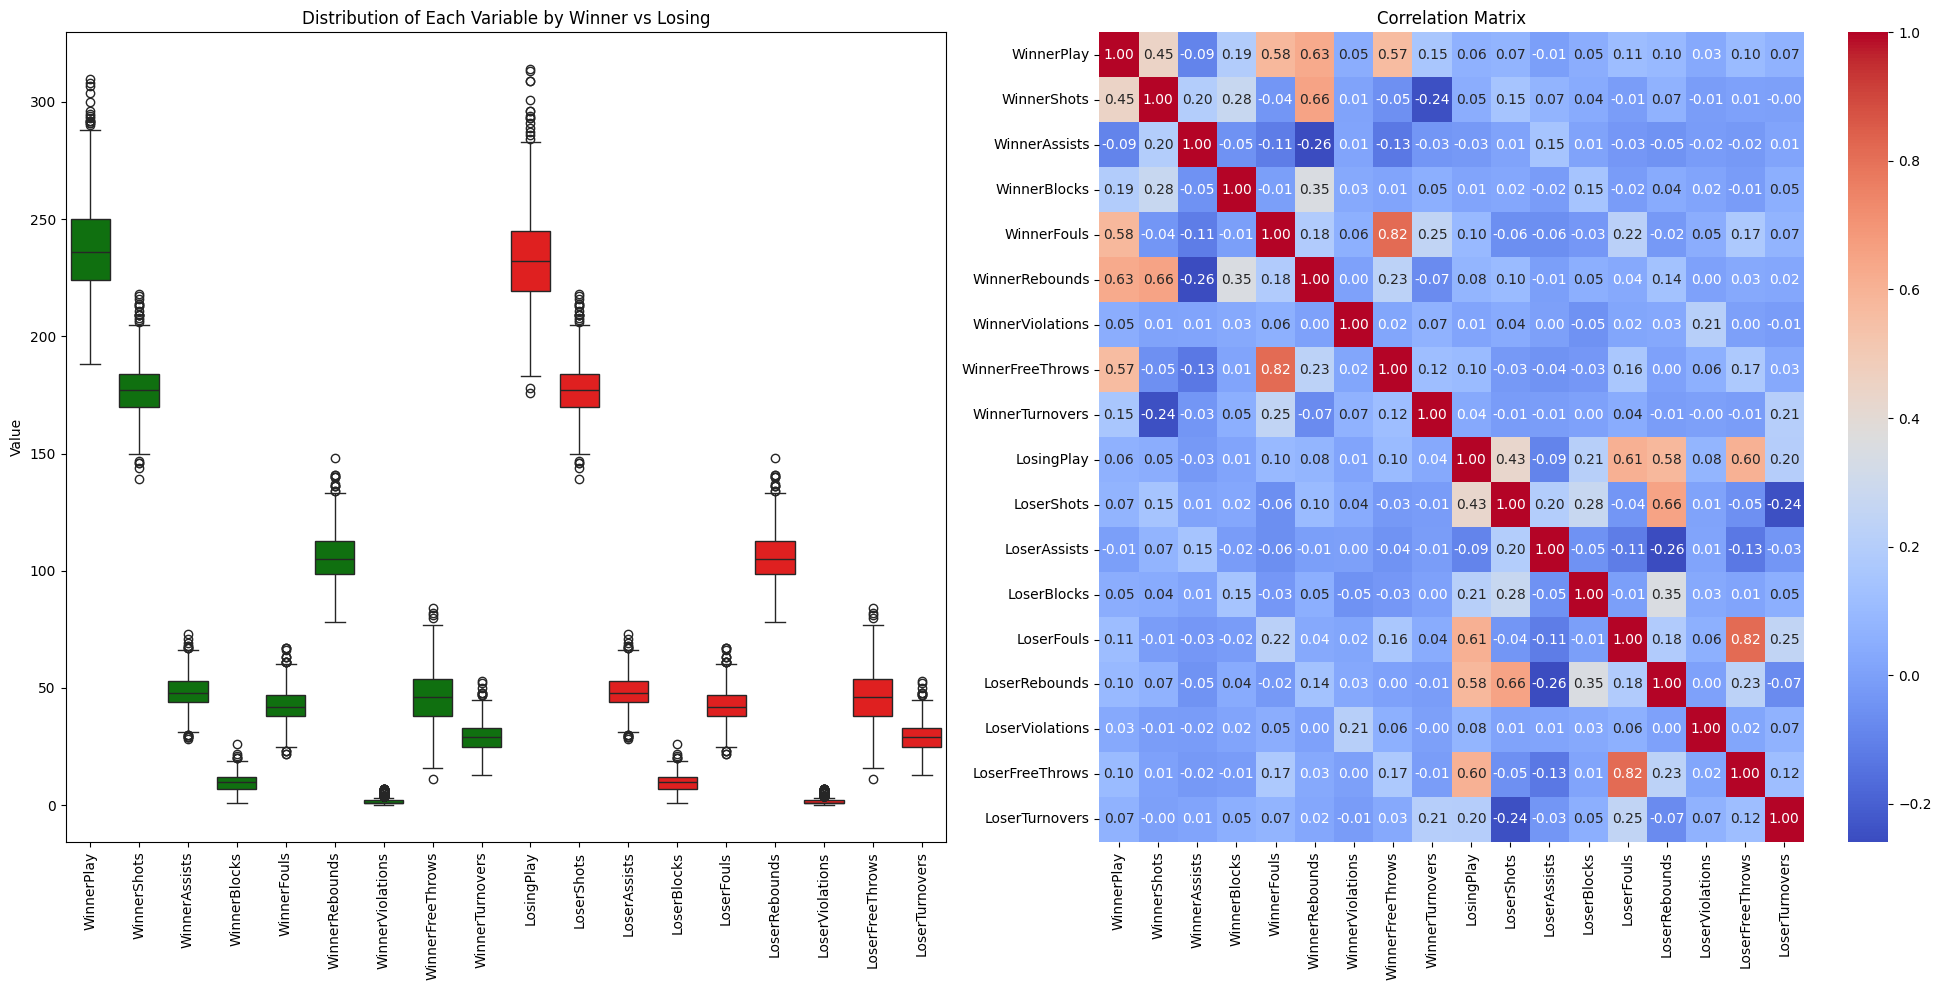

In [ ]:
corr_matrix = playsdata.select_dtypes(include=["number"]).corr()

fig, axes = plt.subplots(1,2, figsize=(20,10))

sns.boxplot(data=playsdata, ax=axes[0], palette=['green','green','green','green','green','green','green','green','green','red','red','red','red','red','red','red','red','red'])
axes[0].set_title('Distribution of Each Variable by Winner vs Losing')
axes[0].set_ylabel('Value')
axes[0].tick_params(axis="x", rotation=90)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1])
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

<ipython-input-13-2f04ad71fd4f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='LosingTeam', palette='coolwarm', ax=axes[0])
<ipython-input-13-2f04ad71fd4f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='WinningTeam', palette='coolwarm', ax=axes[1])


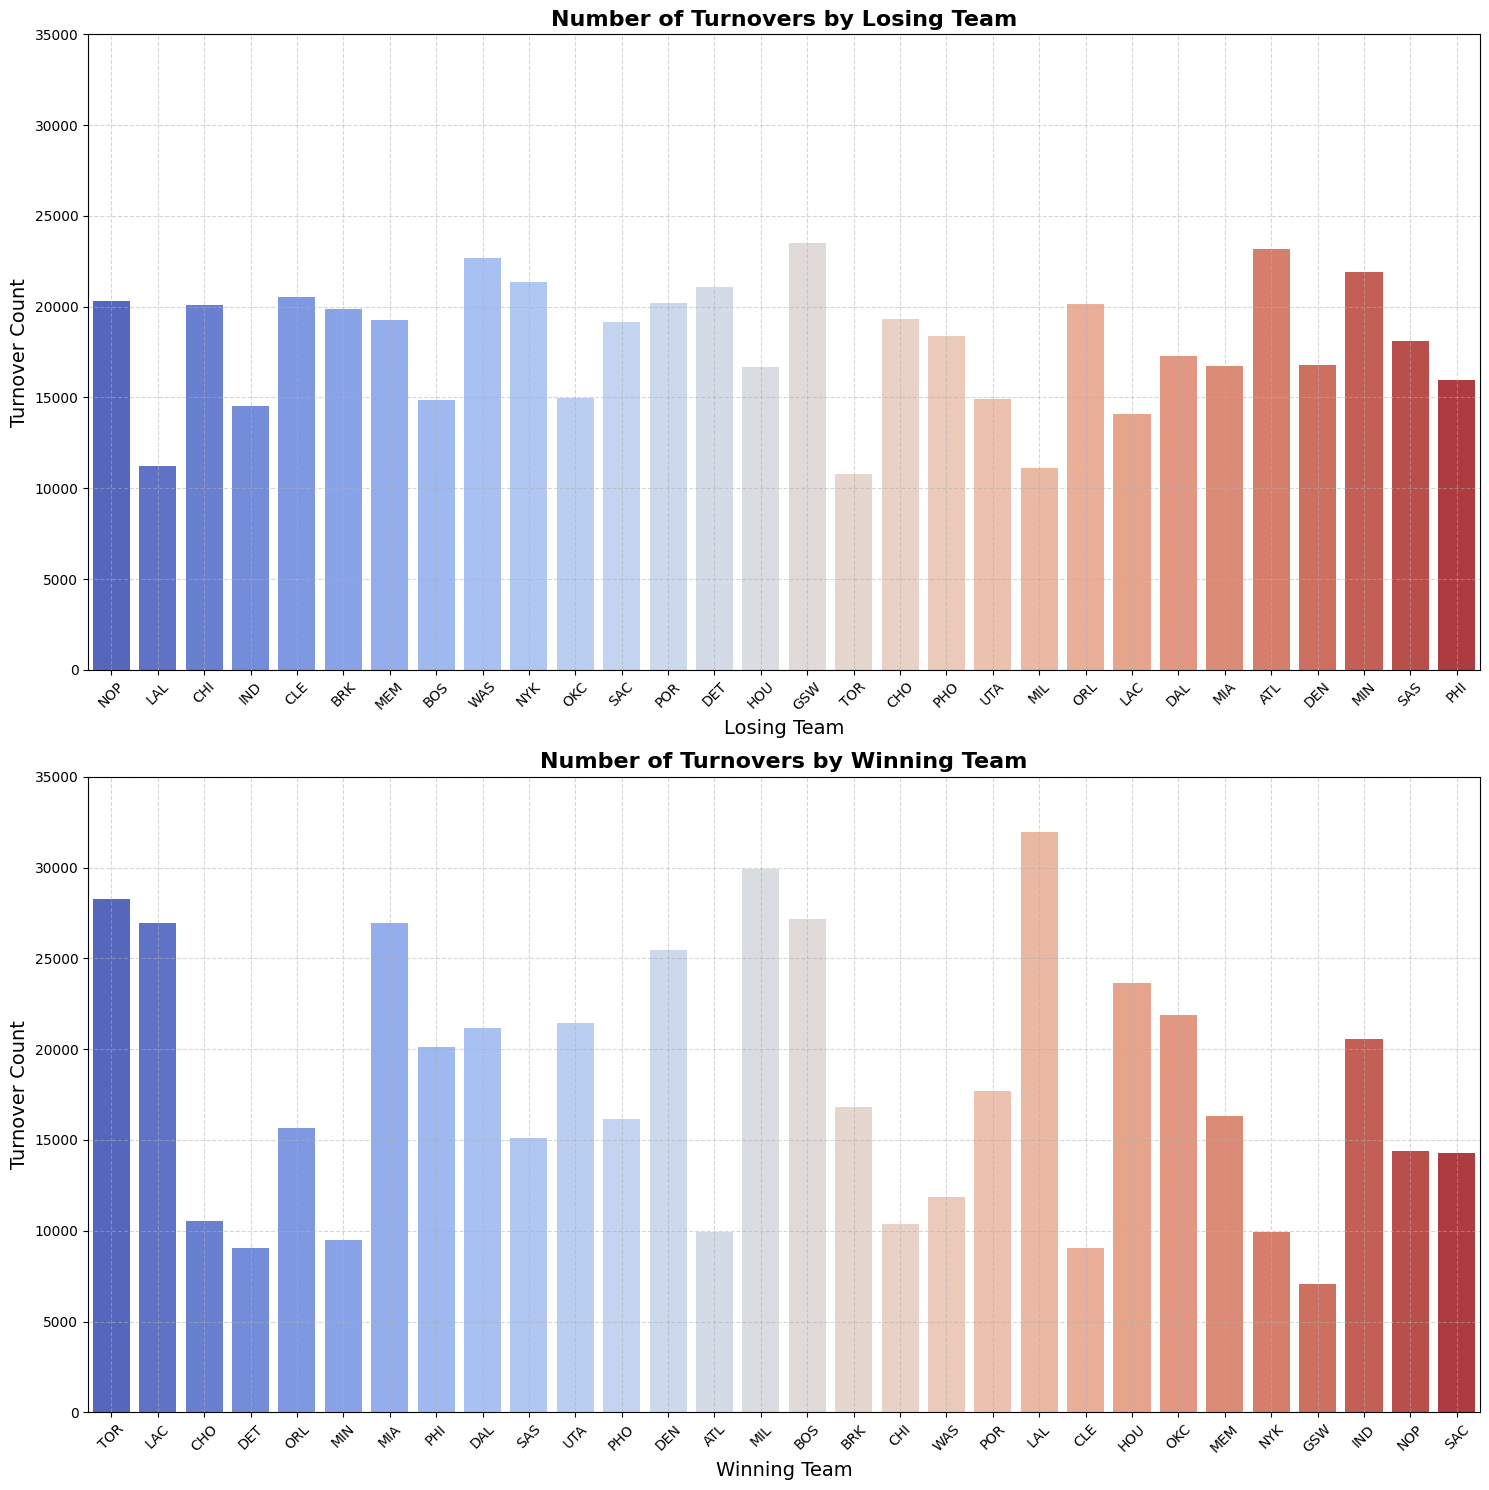

In [ ]:
sampled_data = data.sample(frac=0.01, random_state=3001)

fig, axes = plt.subplots(2,1, figsize=(15,15))

sns.countplot(data=data, x='LosingTeam', palette='coolwarm', ax=axes[0])
axes[0].set_title('Number of Turnovers by Losing Team', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Losing Team', fontsize=14)
axes[0].set_ylabel('Turnover Count', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[0].set_ylim(0, 35000)

sns.countplot(data=data, x='WinningTeam', palette='coolwarm', ax=axes[1])
axes[1].set_title('Number of Turnovers by Winning Team', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Winning Team', fontsize=14)
axes[1].set_ylabel('Turnover Count', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle='--', alpha=0.5)
axes[1].set_ylim(0, 35000)
plt.tight_layout()
plt.show()
